In [158]:
import pandas as pd
import numpy as np # used for linear algebra and random sampling
# used for plotting charts within the notebook (instead of a separate window)

import seaborn as sns
import matplotlib.pyplot as plt

from datetime import datetime

%matplotlib inline


In [159]:
# read in the dataset
crime = pd.read_csv('data/Texas_Crime.csv')
jobs = pd.read_csv('data/Employment_Data.csv')

In [160]:
crime.head()

,ID,Agency,State,Year,Population,Violent crime total,Murder and nonnegligent Manslaughter,Legacy rape,Robbery,Aggravated assault,...,Motor vehicle theft,Violent Crime rate,Murder and nonnegligent manslaughter rate,Legacy rape rate,Robbery rate,Aggravated assault rate,Property crime rate,Burglary rate,Larceny theft rate,Motor vehicle theft rate
0,1,"Austin-Round Rock-San Marcos, TX",TX,2012,986517,3710,32,268,1051,2359,...,2500,887.6,5.8,112.2,218.9,550.7,10986.6,1719.9,8689.5,577.1
1,1,"Austin-Round Rock-San Marcos, TX",TX,2014,1072746,3901,32,0,946,2280,...,2469,838.9,3.5,0.0,191.4,479.0,9189.3,1472.4,7188.6,528.2
2,2,"Dallas-Plano-Irving, TX Metropolitan Division",TX,2012,1739372,9245,158,568,4338,4181,...,7941,1032.0,14.1,71.3,430.2,516.5,9545.8,2266.0,6344.2,935.6
3,2,"Dallas-Plano-Irving, TX Metropolitan Division",TX,2014,1781926,9428,125,0,4187,4219,...,7909,1050.9,12.7,0.0,434.8,497.6,8286.9,1665.7,5715.4,905.7
4,3,"San Antonio-New Braunfels, TX",TX,2012,1440605,7058,90,568,1891,4509,...,6459,693.2,8.1,71.2,179.7,434.2,9478.5,1631.3,7233.8,613.4


In [161]:
crime.rename(columns={"Agency": "AREA_NAME"}, inplace=True)

In [162]:
crime.head()

,ID,AREA_NAME,State,Year,Population,Violent crime total,Murder and nonnegligent Manslaughter,Legacy rape,Robbery,Aggravated assault,...,Motor vehicle theft,Violent Crime rate,Murder and nonnegligent manslaughter rate,Legacy rape rate,Robbery rate,Aggravated assault rate,Property crime rate,Burglary rate,Larceny theft rate,Motor vehicle theft rate
0,1,"Austin-Round Rock-San Marcos, TX",TX,2012,986517,3710,32,268,1051,2359,...,2500,887.6,5.8,112.2,218.9,550.7,10986.6,1719.9,8689.5,577.1
1,1,"Austin-Round Rock-San Marcos, TX",TX,2014,1072746,3901,32,0,946,2280,...,2469,838.9,3.5,0.0,191.4,479.0,9189.3,1472.4,7188.6,528.2
2,2,"Dallas-Plano-Irving, TX Metropolitan Division",TX,2012,1739372,9245,158,568,4338,4181,...,7941,1032.0,14.1,71.3,430.2,516.5,9545.8,2266.0,6344.2,935.6
3,2,"Dallas-Plano-Irving, TX Metropolitan Division",TX,2014,1781926,9428,125,0,4187,4219,...,7909,1050.9,12.7,0.0,434.8,497.6,8286.9,1665.7,5715.4,905.7
4,3,"San Antonio-New Braunfels, TX",TX,2012,1440605,7058,90,568,1891,4509,...,6459,693.2,8.1,71.2,179.7,434.2,9478.5,1631.3,7233.8,613.4


In [164]:
jobs.head()

,Year,PRIM_STATE,AREA,AREA_NAME,OCC_CODE,OCC_TITLE,OCC_GROUP,TOT_EMP,EMP_PRSE,JOBS_1000,...,H_PCT10,H_PCT25,H_MEDIAN,H_PCT75,H_PCT90,A_PCT10,A_PCT25,A_MEDIAN,A_PCT75,A_PCT90
0,2012,OH,10420,"Akron, OH",00-0000,All Occupations,total,314910,1.4,1000,...,8.58,10.44,16.2,25.77,36.67,17840,21710,33690,53590,76270
1,2012,OH,10420,"Akron, OH",11-2000,Management Occupations,major,15660,3.8,49.74,...,22.04,31.09,42.02,59.18,86.55,45840,64660,87400,123090,180030
2,2012,OH,10420,"Akron, OH",11-1011,Chief Executives,detailed,570,11,1.817,...,35.18,58.39,#,#,#,73170,121440,#,#,#
3,2012,OH,10420,"Akron, OH",11-1021,General and Operations Managers,detailed,3710,5.2,11.788,...,23.11,31.9,45.82,72.68,#,48070,66350,95310,151180,#
4,2012,OH,10420,"Akron, OH",11-1031,Legislators,detailed,190,10,0.596,...,*,*,*,*,*,16500,17230,18440,19780,37190


In [165]:
tech_jobs = jobs.loc[(jobs['OCC_TITLE'] == 'Computer and Mathematical Occupations') & (jobs['PRIM_STATE'] == 'TX')]

In [166]:
tech_jobs.head()

,Year,PRIM_STATE,AREA,AREA_NAME,OCC_CODE,OCC_TITLE,OCC_GROUP,TOT_EMP,EMP_PRSE,JOBS_1000,...,H_PCT10,H_PCT25,H_MEDIAN,H_PCT75,H_PCT90,A_PCT10,A_PCT25,A_MEDIAN,A_PCT75,A_PCT90
25007,2012,TX,10180,"Abilene, TX",15-0000,Computer and Mathematical Occupations,major,740,9.2,11.873,...,12.95,17.08,23.01,31.03,39.12,26940,35530,47850,64540,81360
25313,2012,TX,11100,"Amarillo, TX",15-0000,Computer and Mathematical Occupations,major,1640,11.1,14.946,...,14.66,20.46,28.67,38.31,50.56,30490,42560,59640,79690,105170
25692,2012,TX,12420,"Austin-Round Rock-San Marcos, TX",15-0000,Computer and Mathematical Occupations,major,45910,3.6,56.5,...,20.37,27.57,38.59,51.43,65.37,42370,57340,80260,106980,135980
26295,2012,TX,13140,"Beaumont-Port Arthur, TX",15-0000,Computer and Mathematical Occupations,major,1190,9.6,7.569,...,14.55,19.67,27.52,40.31,53.3,30260,40920,57240,83850,110860
26705,2012,TX,15180,"Brownsville-Harlingen, TX",15-0000,Computer and Mathematical Occupations,major,700,8,5.54,...,13.59,17.43,24.33,33.95,43.83,28260,36260,50620,70620,91160


In [277]:
tech_jobs[['TOT_EMP', 'AREA', 'JOBS_1000','A_MEDIAN']] = tech_jobs[['TOT_EMP', 'AREA', 'JOBS_1000','A_MEDIAN']].apply(pd.to_numeric)

/Users/nomathadejenkins/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3391: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


In [278]:
tech_jobs.tail()

,Year,PRIM_STATE,AREA,AREA_NAME,OCC_CODE,OCC_TITLE,OCC_GROUP,TOT_EMP,EMP_PRSE,JOBS_1000,...,H_PCT10,H_PCT25,H_MEDIAN,H_PCT75,H_PCT90,A_PCT10,A_PCT25,A_MEDIAN,A_PCT75,A_PCT90
60087,2014,TX,45500,"Texarkana-Texarkana, TX-AR",15-0000,Computer and Mathematical Occupations,major,340,7.4,6.555,...,15.05,19.4,26.62,36.22,43.17,31310,40360,55380,75330,89780
60337,2014,TX,46340,"Tyler, TX",15-0000,Computer and Mathematical Occupations,major,1290,19,13.594,...,15.04,18.36,27.71,34.97,44.21,31290,38190,57640,72730,91950
60679,2014,TX,47020,"Victoria, TX",15-0000,Computer and Mathematical Occupations,major,360,18.8,6.822,...,15.58,17.97,24.12,34.8,46.1,32410,37380,50160,72380,95880
60941,2014,TX,47380,"Waco, TX",15-0000,Computer and Mathematical Occupations,major,1880,9.4,18.265,...,16.97,22.36,30.79,43.01,56.78,35310,46500,64040,89460,118090
61298,2014,TX,48660,"Wichita Falls, TX",15-0000,Computer and Mathematical Occupations,major,490,17.6,8.757,...,15.64,20.92,27.77,34.58,42.2,32530,43510,57760,71940,87780


In [279]:
tech_jobs.dtypes


Year              int64
PRIM_STATE       object
AREA              int64
AREA_NAME        object
OCC_CODE         object
OCC_TITLE        object
OCC_GROUP        object
TOT_EMP           int64
EMP_PRSE         object
JOBS_1000       float64
LOC QUOTIENT     object
H_MEAN           object
A_MEAN           object
MEAN_PRSE        object
H_PCT10          object
H_PCT25          object
H_MEDIAN         object
H_PCT75          object
H_PCT90          object
A_PCT10          object
A_PCT25          object
A_MEDIAN          int64
A_PCT75          object
A_PCT90          object
dtype: object

In [280]:
#Jobs_1000 measures The number of jobs (employment) in the given occupation per 1,000 jobs in the given area (only on the statewide, metropolitan, and nonmetropolitan area files)
tech_jobs.groupby(['AREA_NAME']).mean().sort_values(by='JOBS_1000', ascending=False)

,Year,AREA,TOT_EMP,JOBS_1000,A_MEDIAN
AREA_NAME,,,,,
"Austin-Round Rock-San Marcos, TX",2013,12420,48415,56.9670,77985
"Dallas-Plano-Irving, TX Metropolitan Division",2013,19124,102160,47.0690,79575
"Houston-Sugar Land-Baytown, TX",2013,26420,76215,27.7480,80095
"San Antonio-New Braunfels, TX",2013,41700,24470,27.5625,71520
"Fort Worth-Arlington, TX Metropolitan Division",2013,23104,22675,25.0280,77750
"College Station-Bryan, TX",2013,17780,2060,21.4670,52695
"Killeen-Temple-Fort Hood, TX",2013,28660,2380,18.4805,63710
"Sherman-Denison, TX",2013,43300,685,16.5325,87520
"Waco, TX",2013,47380,1545,15.1770,59960


In [281]:
tech_jobs[['AREA_NAME','Year', 'TOT_EMP', 'JOBS_1000']].sort_values(by='JOBS_1000', ascending=False)

,AREA_NAME,Year,TOT_EMP,JOBS_1000
51985,"Austin-Round Rock-San Marcos, TX",2014,50920,57.434
25692,"Austin-Round Rock-San Marcos, TX",2012,45910,56.500
54165,"Dallas-Plano-Irving, TX Metropolitan Division",2014,109260,48.808
27813,"Dallas-Plano-Irving, TX Metropolitan Division",2012,95060,45.330
55990,"Houston-Sugar Land-Baytown, TX",2014,82490,29.010
32821,"San Antonio-New Braunfels, TX",2012,24080,27.929
59270,"San Antonio-New Braunfels, TX",2014,24860,27.196
29618,"Houston-Sugar Land-Baytown, TX",2012,69940,26.486
55347,"Fort Worth-Arlington, TX Metropolitan Division",2014,24400,26.235
28970,"Fort Worth-Arlington, TX Metropolitan Division",2012,20950,23.821


In [31]:
#tech_jobs.

In [282]:
tech_jobs.describe()

,Year,AREA,TOT_EMP,JOBS_1000,A_MEDIAN
count,52.000000,52.000000,52.000000,52.000000,52.000000
mean,2013.000000,29711.846154,11546.346154,16.320885,61608.846154
std,1.009756,12604.641758,25347.510689,12.271328,10931.488364
min,2012.000000,10180.000000,290.000000,4.742000,47850.000000
25%,2012.000000,18580.000000,707.500000,8.332250,54000.000000
50%,2013.000000,30340.000000,1365.000000,12.774000,57910.000000
75%,2014.000000,41700.000000,2320.000000,18.614000,64992.500000
max,2014.000000,48660.000000,109260.000000,57.434000,90650.000000


In [283]:
tech_jobs.corr()

,Year,AREA,TOT_EMP,JOBS_1000,A_MEDIAN
Year,1.000000e+00,-3.362747e-17,0.028828,0.011143,0.099690
AREA,-3.362747e-17,1.000000e+00,-0.254931,-0.303276,-0.052505
TOT_EMP,2.882784e-02,-2.549313e-01,1.000000,0.805675,0.645158
JOBS_1000,1.114340e-02,-3.032757e-01,0.805675,1.000000,0.676035
A_MEDIAN,9.969000e-02,-5.250516e-02,0.645158,0.676035,1.000000


In [34]:
#jobs['OCC_TITLE'].unique()

In [143]:
jobs.columns


Index(['Year', 'PRIM_STATE', 'AREA', 'AREA_NAME', 'OCC_CODE', 'OCC_TITLE',
       'OCC_GROUP', 'TOT_EMP', 'EMP_PRSE', 'JOBS_1000', 'LOC QUOTIENT',
       'H_MEAN', 'A_MEAN', 'MEAN_PRSE', 'H_PCT10', 'H_PCT25', 'H_MEDIAN',
       'H_PCT75', 'H_PCT90', 'A_PCT10', 'A_PCT25', 'A_MEDIAN', 'A_PCT75',
       'A_PCT90'],
      dtype='object')

In [145]:
pd.DataFrame(crime.dtypes, columns=['DataType'])

,DataType
ID,int64
AREA_NAME,object
State,object
Year,int64
Population,int64
Violent crime total,int64
Murder and nonnegligent Manslaughter,int64
Legacy rape,int64
Robbery,int64
Aggravated assault,int64


In [41]:
#pd.DataFrame(jobs.dtypes, columns=['DataType'])

In [146]:
crime.mean()

ID                                                 3.00
Year                                            2013.00
Population                                   1556739.00
Violent crime total                             9832.20
Murder and nonnegligent Manslaughter             113.90
Legacy rape                                      261.40
Robbery                                         3748.10
Aggravated assault                              5283.60
Property crime total                           69279.30
Burglary                                       14673.40
Larceny theft                                  47650.20
Motor vehicle theft                             6955.70
Violent Crime rate                              1033.63
Murder and nonnegligent manslaughter rate         10.86
Legacy rape rate                                  39.66
Robbery rate                                     340.59
Aggravated assault rate                          585.50
Property crime rate                             

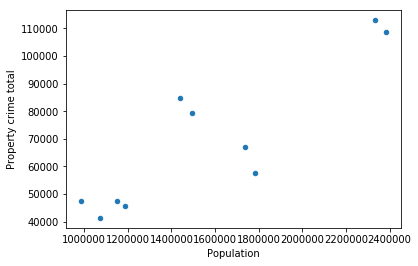

In [147]:
#sns.lmplot(x='Population', y='violent crime total', data=jobs);
crime.plot(kind='scatter', x='Population', y='Property crime total')

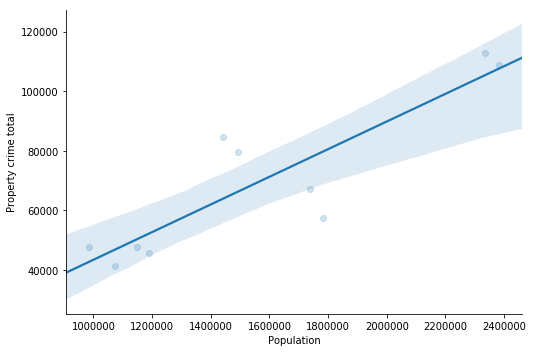

In [55]:
sns.lmplot(x='Population', y='Property crime total', data=crime, aspect=1.5, scatter_kws={'alpha':0.2});

In [236]:
# Create feature column variables
feature_cols = ['Violent crime total', 'Property crime total','Motor vehicle theft', 'Burglary', 'Aggravated assault','Murder and nonnegligent Manslaughter', 'Legacy rape', 'Larceny theft']

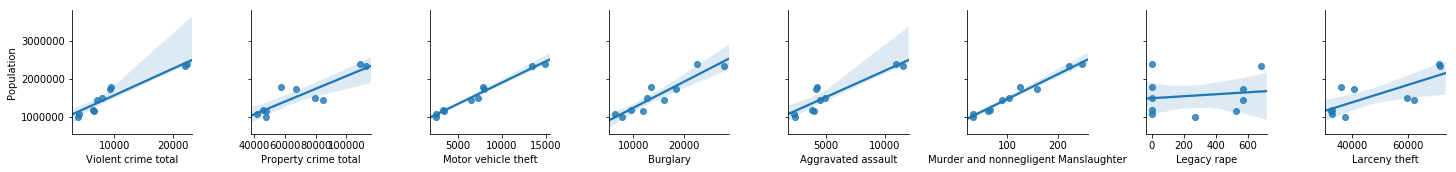

In [237]:
# Multiple scatterplots in Seaborn
sns.pairplot(crime, x_vars=feature_cols, y_vars='Population', kind='reg');

In [58]:
crime.corr()

,ID,Year,Population,Violent crime total,Murder and nonnegligent Manslaughter,Legacy rape,Robbery,Aggravated assault,Property crime total,Burglary,...,Motor vehicle theft,Violent Crime rate,Murder and nonnegligent manslaughter rate,Legacy rape rate,Robbery rate,Aggravated assault rate,Property crime rate,Burglary rate,Larceny theft rate,Motor vehicle theft rate
ID,1.000000,0.000000,0.261086,0.396246,0.312482,0.160187,0.306230,0.471932,0.299346,0.368314,...,0.268158,0.483423,0.480757,-0.113738,0.298548,0.705295,-0.251653,0.283605,-0.476231,0.133374
Year,0.000000,1.000000,0.056183,0.023300,0.015432,-0.936981,0.007901,-0.013337,-0.109304,-0.274435,...,0.052408,0.007346,-0.031106,-0.946488,-0.047138,-0.073975,-0.460197,-0.561879,-0.372240,0.104105
Population,0.261086,0.056183,1.000000,0.953902,0.987601,0.153291,0.959077,0.912153,0.882111,0.928005,...,0.989118,0.768336,0.912137,-0.257960,0.882392,0.490692,0.485165,0.662960,0.098708,0.960304
Violent crime total,0.396246,0.023300,0.953902,1.000000,0.956123,0.165366,0.986447,0.986404,0.886812,0.915916,...,0.958849,0.871956,0.891907,-0.203127,0.893621,0.690076,0.563292,0.717669,0.189399,0.901974
Murder and nonnegligent Manslaughter,0.312482,0.015432,0.987601,0.956123,1.000000,0.181865,0.962966,0.915299,0.878419,0.934618,...,0.983724,0.791478,0.941597,-0.208622,0.890085,0.537620,0.485407,0.690755,0.085736,0.965750
Legacy rape,0.160187,-0.936981,0.153291,0.165366,0.181865,1.000000,0.162530,0.205701,0.290236,0.487305,...,0.138895,0.130082,0.208389,0.776280,0.199757,0.171001,0.425970,0.695718,0.235082,0.041796
Robbery,0.306230,0.007901,0.959077,0.986447,0.962966,0.162530,1.000000,0.948216,0.836238,0.902282,...,0.951565,0.888642,0.910631,-0.174567,0.943374,0.641241,0.581687,0.744658,0.193531,0.933518
Aggravated assault,0.471932,-0.013337,0.912153,0.986404,0.915299,0.205701,0.948216,1.000000,0.912212,0.910413,...,0.930378,0.839653,0.842832,-0.171961,0.824762,0.733284,0.568233,0.701901,0.219252,0.833903
Property crime total,0.299346,-0.109304,0.882111,0.886812,0.878419,0.290236,0.836238,0.912212,1.000000,0.910530,...,0.927722,0.567191,0.728249,-0.088961,0.636548,0.457846,0.613485,0.576750,0.339028,0.800731
Burglary,0.368314,-0.274435,0.928005,0.915916,0.934618,0.487305,0.902282,0.910413,0.910530,1.000000,...,0.922467,0.733725,0.876170,0.035328,0.825759,0.554723,0.576700,0.824369,0.176212,0.838885


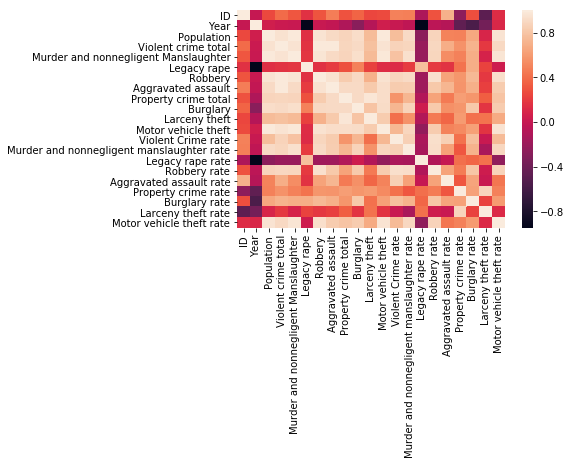

In [59]:
sns.heatmap(crime.corr())

In [176]:
#merge_column = pd.concat([tech_jobs, crime], sort=False)

In [126]:
#merge_column = pd.merge(tech_jobs, crime, on='AREA_NAME', how='outer')

In [179]:
#merge_column = crime.join(tech_jobs, on=['AREA_NAME', 'Year'], how='inner')

In [284]:
merge_column = pd.merge(tech_jobs, crime, on=['AREA_NAME', 'Year'], how='inner')

In [285]:
merge_column.head(5)

,Year,PRIM_STATE,AREA,AREA_NAME,OCC_CODE,OCC_TITLE,OCC_GROUP,TOT_EMP,EMP_PRSE,JOBS_1000,...,Motor vehicle theft,Violent Crime rate,Murder and nonnegligent manslaughter rate,Legacy rape rate,Robbery rate,Aggravated assault rate,Property crime rate,Burglary rate,Larceny theft rate,Motor vehicle theft rate
0,2012,TX,12420,"Austin-Round Rock-San Marcos, TX",15-0000,Computer and Mathematical Occupations,major,45910,3.6,56.500,...,2500,887.6,5.8,112.2,218.9,550.7,10986.6,1719.9,8689.5,577.1
1,2012,TX,19124,"Dallas-Plano-Irving, TX Metropolitan Division",15-0000,Computer and Mathematical Occupations,major,95060,2.5,45.330,...,7941,1032.0,14.1,71.3,430.2,516.5,9545.8,2266.0,6344.2,935.6
2,2012,TX,23104,"Fort Worth-Arlington, TX Metropolitan Division",15-0000,Computer and Mathematical Occupations,major,20950,8.7,23.821,...,3374,1090.9,10.3,86.4,306.5,687.8,8205.4,2030.3,5610.0,565.3
3,2012,TX,26420,"Houston-Sugar Land-Baytown, TX",15-0000,Computer and Mathematical Occupations,major,69940,4.1,26.486,...,13412,1455.8,16.7,55.5,605.9,777.7,11754.1,2833.4,7865.8,1055.0
4,2012,TX,41700,"San Antonio-New Braunfels, TX",15-0000,Computer and Mathematical Occupations,major,24080,6.3,27.929,...,6459,693.2,8.1,71.2,179.7,434.2,9478.5,1631.3,7233.8,613.4


In [286]:
merge_column.shape

(10, 45)

In [187]:
merge_column.tail()

,Year,PRIM_STATE,AREA,AREA_NAME,OCC_CODE,OCC_TITLE,OCC_GROUP,TOT_EMP,EMP_PRSE,JOBS_1000,...,Motor vehicle theft,Violent Crime rate,Murder and nonnegligent manslaughter rate,Legacy rape rate,Robbery rate,Aggravated assault rate,Property crime rate,Burglary rate,Larceny theft rate,Motor vehicle theft rate
5,2014,TX,12420,"Austin-Round Rock-San Marcos, TX",15-0000,Computer and Mathematical Occupations,major,50920,4.5,57.434,...,2469,838.9,3.5,0.0,191.4,479.0,9189.3,1472.4,7188.6,528.2
6,2014,TX,19124,"Dallas-Plano-Irving, TX Metropolitan Division",15-0000,Computer and Mathematical Occupations,major,109260,2.9,48.808,...,7909,1050.9,12.7,0.0,434.8,497.6,8286.9,1665.7,5715.4,905.7
7,2014,TX,23104,"Fort Worth-Arlington, TX Metropolitan Division",15-0000,Computer and Mathematical Occupations,major,24400,5.9,26.235,...,3260,1042.2,10.0,0.0,270.3,637.2,7515.7,1530.7,5455.9,529.1
8,2014,TX,26420,"Houston-Sugar Land-Baytown, TX",15-0000,Computer and Mathematical Occupations,major,82490,2.6,29.010,...,14919,1423.9,18.7,0.0,611.3,708.3,10479.9,2069.7,7141.9,1268.3
9,2014,TX,41700,"San Antonio-New Braunfels, TX",15-0000,Computer and Mathematical Occupations,major,24860,8.1,27.196,...,7314,820.9,8.7,0.0,156.9,566.0,8669.0,1348.5,6551.5,769.1


In [287]:
merge_column.corr()

,Year,AREA,TOT_EMP,JOBS_1000,A_MEDIAN,ID,Population,Violent crime total,Murder and nonnegligent Manslaughter,Legacy rape,...,Motor vehicle theft,Violent Crime rate,Murder and nonnegligent manslaughter rate,Legacy rape rate,Robbery rate,Aggravated assault rate,Property crime rate,Burglary rate,Larceny theft rate,Motor vehicle theft rate
Year,1.000000,0.000000,0.116237,0.067107,0.275856,0.000000,0.056183,0.023300,0.015432,-0.936981,...,0.052408,0.007346,-0.031106,-0.946488,-0.047138,-0.073975,-0.460197,-0.561879,-0.372240,0.104105
AREA,0.000000,1.000000,-0.405819,-0.731979,-0.625584,0.415338,0.250903,0.202160,0.245068,0.143873,...,0.327013,-0.174643,0.151040,-0.134328,-0.155807,0.000236,-0.095103,-0.120235,-0.101290,0.127909
TOT_EMP,0.116237,-0.405819,1.000000,0.425299,0.597677,-0.353636,0.624294,0.466084,0.589900,-0.050696,...,0.546113,0.476643,0.577129,-0.184475,0.709364,-0.010154,0.292442,0.421801,0.016725,0.713674
JOBS_1000,0.067107,-0.731979,0.425299,1.000000,0.280441,-0.916319,-0.338021,-0.426065,-0.378757,-0.251002,...,-0.378501,-0.326288,-0.452556,0.086125,-0.194290,-0.571026,0.146450,-0.239244,0.336815,-0.190633
A_MEDIAN,0.275856,-0.625584,0.597677,0.280441,1.000000,0.001874,0.307347,0.344541,0.332258,-0.351828,...,0.256093,0.590498,0.456478,-0.186469,0.593212,0.331892,0.153825,0.231649,-0.007264,0.423487
ID,0.000000,0.415338,-0.353636,-0.916319,0.001874,1.000000,0.261086,0.396246,0.312482,0.160187,...,0.268158,0.483423,0.480757,-0.113738,0.298548,0.705295,-0.251653,0.283605,-0.476231,0.133374
Population,0.056183,0.250903,0.624294,-0.338021,0.307347,0.261086,1.000000,0.953902,0.987601,0.153291,...,0.989118,0.768336,0.912137,-0.257960,0.882392,0.490692,0.485165,0.662960,0.098708,0.960304
Violent crime total,0.023300,0.202160,0.466084,-0.426065,0.344541,0.396246,0.953902,1.000000,0.956123,0.165366,...,0.958849,0.871956,0.891907,-0.203127,0.893621,0.690076,0.563292,0.717669,0.189399,0.901974
Murder and nonnegligent Manslaughter,0.015432,0.245068,0.589900,-0.378757,0.332258,0.312482,0.987601,0.956123,1.000000,0.181865,...,0.983724,0.791478,0.941597,-0.208622,0.890085,0.537620,0.485407,0.690755,0.085736,0.965750
Legacy rape,-0.936981,0.143873,-0.050696,-0.251002,-0.351828,0.160187,0.153291,0.165366,0.181865,1.000000,...,0.138895,0.130082,0.208389,0.776280,0.199757,0.171001,0.425970,0.695718,0.235082,0.041796


In [289]:
# Create feature column variables
feature_cols2 = ['Violent crime total', 'Aggravated assault','Murder and nonnegligent Manslaughter', 'Robbery']

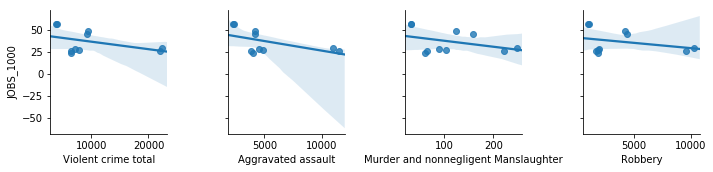

In [271]:
sns.pairplot(merge_column, x_vars=feature_cols2, y_vars='JOBS_1000', aspect=1, kind='reg');

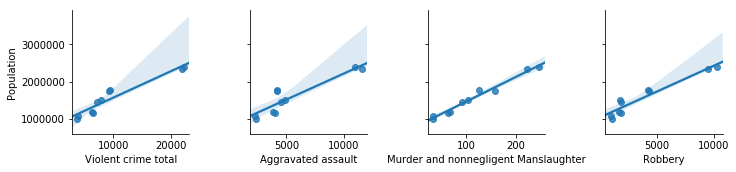

In [272]:
sns.pairplot(merge_column, x_vars=feature_cols2, y_vars='Population', aspect=1, kind='reg');

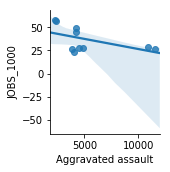

In [217]:
sns.pairplot(merge_column, x_vars='Aggravated assault', y_vars='JOBS_1000', kind='reg');

In [252]:
feature_cols3 = [ 'Property crime total', 'Burglary', 'Motor vehicle theft']

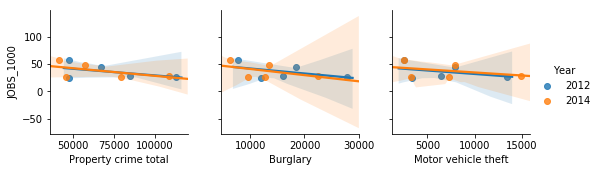

In [254]:
sns.pairplot(merge_column, x_vars=feature_cols3, y_vars='JOBS_1000', hue='Year', kind='reg');

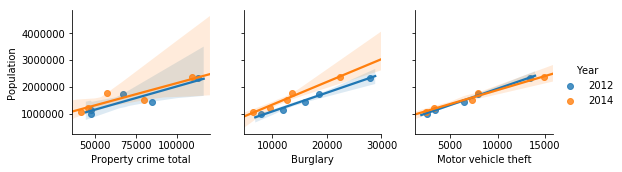

In [273]:
sns.pairplot(merge_column, x_vars=feature_cols3, y_vars='Population', hue='Year', kind='reg');

In [292]:
#A_MEDIAN
#sns.pairplot(merge_column, x_vars=feature_cols3, y_vars='JOBS_1000', hue='A_MEDIAN', kind='reg');

In [240]:
#sns.pairplot(merge_column, x_vars=feature_cols2, y_vars='Year', kind='reg');

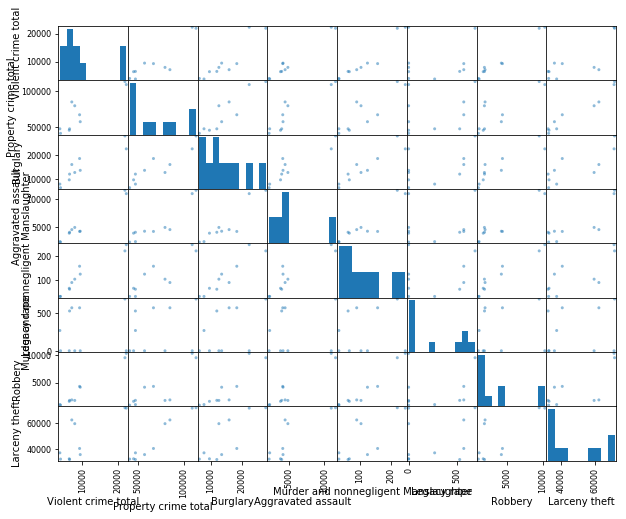

In [275]:
pd.plotting.scatter_matrix(merge_column[['Violent crime total', 'Property crime total', 'Burglary', 'Aggravated assault','Murder and nonnegligent Manslaughter', 'Legacy rape', 'Robbery', 'Larceny theft', 'A_MEDIAN']], figsize=(10, 8));

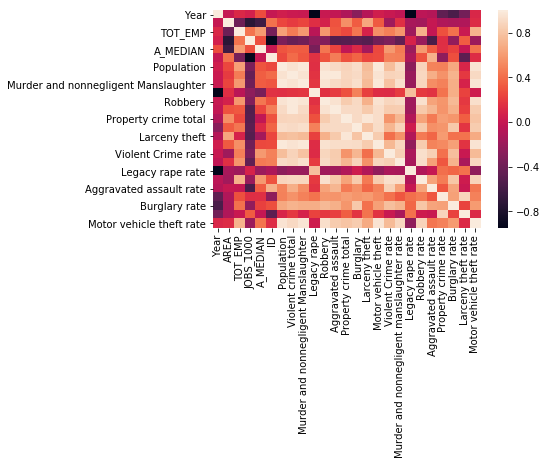

In [293]:
sns.heatmap(merge_column.corr())

In [241]:
#merge_column.plot(kind='scatter', x='JOBS_1000', y='Property crime total')

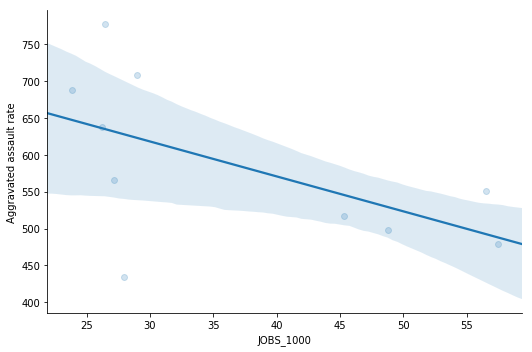

In [227]:
sns.lmplot(x='JOBS_1000', y='Aggravated assault rate', data=merge_column, aspect=1.5, scatter_kws={'alpha':0.2});

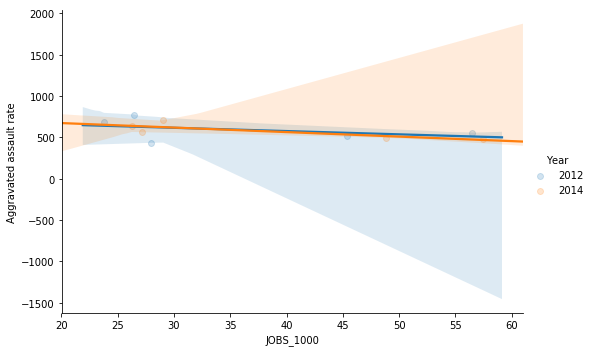

In [225]:
sns.lmplot(x='JOBS_1000', y='Aggravated assault rate', hue='Year', data=merge_column, aspect=1.5, scatter_kws={'alpha':0.2});

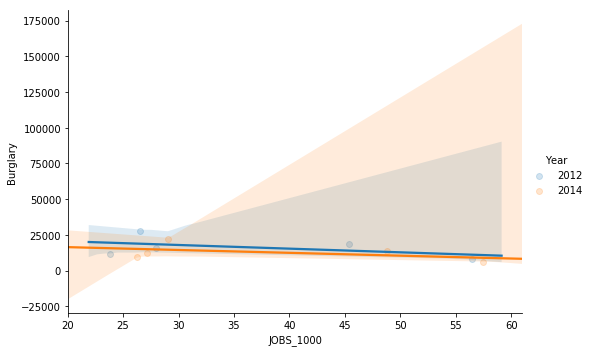

In [226]:
sns.lmplot(x='JOBS_1000', y='Burglary', hue='Year', data=merge_column, aspect=1.5, scatter_kws={'alpha':0.2});

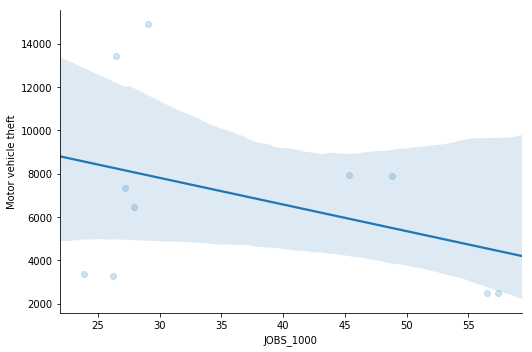

In [249]:
sns.lmplot(x='JOBS_1000', y='Motor vehicle theft', data=merge_column, aspect=1.5, scatter_kws={'alpha':0.2});

In [242]:
merge_column.drop('Population', axis=1).plot(kind='box');

In [294]:
merge_column.describe()

,Year,AREA,TOT_EMP,JOBS_1000,A_MEDIAN,ID,Population,Violent crime total,Murder and nonnegligent Manslaughter,Legacy rape,...,Motor vehicle theft,Violent Crime rate,Murder and nonnegligent manslaughter rate,Legacy rape rate,Robbery rate,Aggravated assault rate,Property crime rate,Burglary rate,Larceny theft rate,Motor vehicle theft rate
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,1.000000e+01,10.000000,10.000000,10.000000,...,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,2013.000000,24553.600000,54787.000000,36.874900,77385.000000,3.000000,1.556739e+06,9832.200000,113.900000,261.400000,...,6955.700000,1033.630000,10.860000,39.660000,340.590000,585.500000,9411.120000,1856.790000,6779.660000,774.680000
std,1.054093,10287.950095,32637.579244,13.535208,3977.842101,1.490712,4.997650e+05,6767.801494,75.136099,294.071873,...,4394.733668,248.234558,4.744166,44.168898,171.067014,112.285103,1335.284259,449.098528,1044.916722,257.182088
min,2012.000000,12420.000000,20950.000000,23.821000,71070.000000,1.000000,9.865170e+05,3710.000000,32.000000,0.000000,...,2469.000000,693.200000,3.500000,0.000000,156.900000,434.200000,7515.700000,1348.500000,5455.900000,528.200000
25%,2012.000000,19124.000000,24515.000000,26.663500,74862.500000,2.000000,1.159018e+06,6368.000000,63.000000,0.000000,...,3288.500000,851.075000,8.250000,0.000000,198.275000,502.325000,8382.425000,1555.850000,5872.600000,568.250000
50%,2013.000000,23104.000000,48415.000000,28.469500,77905.000000,3.000000,1.466846e+06,7472.000000,97.000000,134.000000,...,6886.500000,1037.100000,10.150000,27.750000,288.400000,558.350000,9333.900000,1692.800000,6846.700000,691.250000
75%,2014.000000,26420.000000,79352.500000,47.938500,80590.000000,4.000000,1.771288e+06,9382.250000,149.750000,557.500000,...,7933.000000,1080.900000,13.750000,71.275000,433.650000,675.150000,10246.375000,2059.850000,7222.500000,928.125000
max,2014.000000,41700.000000,109260.000000,57.434000,82830.000000,5.000000,2.381241e+06,22348.000000,248.000000,684.000000,...,14919.000000,1455.800000,18.700000,112.200000,611.300000,777.700000,11754.100000,2833.400000,8689.500000,1268.300000


In [229]:
merge_column['TOT_EMP'].var()

1065211578.8888888

In [297]:
export_csv = merge_column.to_csv (r'C:\Users\nomathadejenkins\Desktop\export_dataframe.csv', index = None, header=True) #Don't forget to add '.csv' at the end of the path

#print (merge_column)

In [233]:
merge_column[['AREA_NAME','Year', 'TOT_EMP', 'JOBS_1000', 'Population']].sort_values(by='JOBS_1000', ascending=False)

,AREA_NAME,Year,TOT_EMP,JOBS_1000,Population
5,"Austin-Round Rock-San Marcos, TX",2014,50920,57.434,1072746
0,"Austin-Round Rock-San Marcos, TX",2012,45910,56.500,986517
6,"Dallas-Plano-Irving, TX Metropolitan Division",2014,109260,48.808,1781926
1,"Dallas-Plano-Irving, TX Metropolitan Division",2012,95060,45.330,1739372
8,"Houston-Sugar Land-Baytown, TX",2014,82490,29.010,2381241
4,"San Antonio-New Braunfels, TX",2012,24080,27.929,1440605
9,"San Antonio-New Braunfels, TX",2014,24860,27.196,1493087
3,"Houston-Sugar Land-Baytown, TX",2012,69940,26.486,2334617
7,"Fort Worth-Arlington, TX Metropolitan Division",2014,24400,26.235,1187883
2,"Fort Worth-Arlington, TX Metropolitan Division",2012,20950,23.821,1149396


In [295]:
merge_column[['AREA_NAME','Year', 'TOT_EMP', 'JOBS_1000', 'Population', 'Motor vehicle theft','A_MEDIAN']].sort_values(by='Population', ascending=False)

,AREA_NAME,Year,TOT_EMP,JOBS_1000,Population,Motor vehicle theft,A_MEDIAN
8,"Houston-Sugar Land-Baytown, TX",2014,82490,29.010,2381241,14919,82830
3,"Houston-Sugar Land-Baytown, TX",2012,69940,26.486,2334617,13412,77360
6,"Dallas-Plano-Irving, TX Metropolitan Division",2014,109260,48.808,1781926,7909,80700
1,"Dallas-Plano-Irving, TX Metropolitan Division",2012,95060,45.330,1739372,7941,78450
9,"San Antonio-New Braunfels, TX",2014,24860,27.196,1493087,7314,71970
4,"San Antonio-New Braunfels, TX",2012,24080,27.929,1440605,6459,71070
7,"Fort Worth-Arlington, TX Metropolitan Division",2014,24400,26.235,1187883,3260,80920
2,"Fort Worth-Arlington, TX Metropolitan Division",2012,20950,23.821,1149396,3374,74580
5,"Austin-Round Rock-San Marcos, TX",2014,50920,57.434,1072746,2469,75710
0,"Austin-Round Rock-San Marcos, TX",2012,45910,56.500,986517,2500,80260


In [296]:
merge_column[['AREA_NAME','Year', 'TOT_EMP', 'JOBS_1000', 'Population', 'Motor vehicle theft','A_MEDIAN']].sort_values(by='A_MEDIAN', ascending=False)

,AREA_NAME,Year,TOT_EMP,JOBS_1000,Population,Motor vehicle theft,A_MEDIAN
8,"Houston-Sugar Land-Baytown, TX",2014,82490,29.010,2381241,14919,82830
7,"Fort Worth-Arlington, TX Metropolitan Division",2014,24400,26.235,1187883,3260,80920
6,"Dallas-Plano-Irving, TX Metropolitan Division",2014,109260,48.808,1781926,7909,80700
0,"Austin-Round Rock-San Marcos, TX",2012,45910,56.500,986517,2500,80260
1,"Dallas-Plano-Irving, TX Metropolitan Division",2012,95060,45.330,1739372,7941,78450
3,"Houston-Sugar Land-Baytown, TX",2012,69940,26.486,2334617,13412,77360
5,"Austin-Round Rock-San Marcos, TX",2014,50920,57.434,1072746,2469,75710
2,"Fort Worth-Arlington, TX Metropolitan Division",2012,20950,23.821,1149396,3374,74580
9,"San Antonio-New Braunfels, TX",2014,24860,27.196,1493087,7314,71970
4,"San Antonio-New Braunfels, TX",2012,24080,27.929,1440605,6459,71070
